# PA 2: Classification - Nearest Neighbors

## Student Details (2.5 Points)
List names and IDs of students worked on KNN:
 Name : Lolita Louis Dmello
 ID   : 1002020314

## Team Information:

Team ID: 22
Names and IDs of Team members:         
Ashik Maraliga Venkatesh - 1002023308       
Sarath Kumar Devraj - 1002041910

## Note:

1. When submitting, fill above details in this cell. 
2. Do not remove any of these cells. Add your code below.

## Programming Assignment Details (70 Points)

For this assignment use Jupyter notebook, Pandas, and scikit.

* Load dataset_NN.csv dataset. [2 points]
* Data Pre-processing. [10 points]
* Using Pearson's Correlation Coefficient find out the relation between varaibles using Heat Map(Draw heat maps before and after cleaning data to find differences) [5 points]
* Scale the data and mention which scaling technique used [2 point]
* Split your dataset 75% for training, and 25% for testing and do cross validation for the classifier. [2 points]
* Find the best K using elbow method. [5 points]
* Use Euclidean distance.[2 points]
* Select three best attributes and explain why you chose them.[15 points]
* Test the classifier with three different k values for neighbors and record the results.[15 points]
* Plot the ROC curve for best K value.[5 points]
* Use comments to explain your code at each step of all points.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.[15 points]

## Note:

1. Make sure to write about any 4-5 line to explain any kind of visualization
2. Do not to forget to cite any external sources used by you.

## Report (25 Points)

For each classification task you need to submit a report (PDF) that you have to:

* Include a paragraph describing the contribution made by each team member
* Describe the Nearest Neighbors method and why scaling is important in KNN. [5 points]
* Explain what was your criteria for selecting the three attributes. What other 3 attribute can you choose? Visualizations of the target variable w.r.t three most significant attributes in a 2D projection, and write your observations in 4 - 5 lines [5 points]
* Explain Pearson's Correlation Coefficient, write the observations from heatmaps drawn . [5 points]
* Interpret and compare the results.[5 points]
* Do not to forget to cite your sources![5 points]

## Programming Assignment Submission Instructions (2.5 Points)

### Each file should be submitted separately, do not compress them. (For example if you have 3 different files, you have to submit 3 files each one at a time)

For Nearest Neighbor:
1.	'yourLastName_Last4digitsofyourID_NN.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)
2.	Report in PDF (optional)

### <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

# *Data set Information*
> Features Description:
* Pregnancies → Number of times pregnant
* Glucose → Plasma glucose concentration 2 hours in an oral glucose tolerance 
test
* BloodPressure → Diastolic blood pressure (mm Hg)
* SkinThickness → Triceps skin fold thickness (mm)
* Insulin → 2-Hour serum insulin (mu U/ml)
* BMI → Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction → Diabetes pedigree function
* Age → Age (years)

> Target	Variable:
* Outcome - Class variable (0 or 1) (diabeties absent or present)


# *Required python packages*

In [246]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

#TASK 1 - *Retriving data* [2 points]
The Python code below reads the dataset into a Pandas data frame with the name 'df'. For this code to work, the file dataset_KNN.csv must be in the same folder as this file.

In [247]:
df = pd.read_csv('dataset_KNN.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Exploratory Data Analysis

Data set consist of 768 data points, with 9 features.

In [248]:
print("Shape of cancer data: ", df.shape)

Shape of cancer data:  (768, 9)


In [249]:
#some basic understanding of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [250]:
# the outcome colum consist of 500 entries of '0' and 268 entries of '1'
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [251]:
# count of missing values for each columns respectively
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [252]:
# count the number of duplicated rows in the dataset
print('number of duplicated rows in the dataset: ', df.duplicated().sum())

number of duplicated rows in the dataset:  0


#Task 3(A) - *Pearson's Correlation Coefficient relation between varaibles using Heat Map*
The linear correlation between two variables is quantified by Pearson's correlation coefficient. Its value falls between -1 and 1, with -1 denoting a perfect negative correlation, 0 denoting no connection, and 1 denoting a perfect positive correlation. The correlation matrix between each pair of variables in a dataset can be seen clearly using a heat map. Warmer hues, such as red, denote a positive correlation while cooler hues, such as blue, denote a negative correlation on heat maps

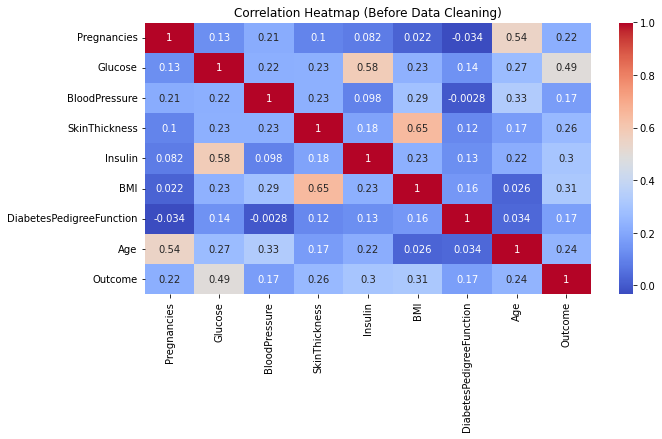

In [253]:
# Check the correlation between variables using Pearson's Correlation Coefficient
plt.figure(figsize=(10,5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Before Data Cleaning)')
plt.show()

We can see that there are some missing values (represented by cool color cells) and some highly correlated features (e.g.Glucose and BMI).



# Task 2 - Data Pre-processing [10 points]

Since it may capture more complex relationships between variables than simpler imputation approaches like mean or median, I will utilize IterativeImputer to fill in the missing data.

IterativeImputer is a subclass of imputer in scikit-learn that estimates missing values in a dataset using machine learning models. Its foundation is the assumption that missing values can be imputed repeatedly by modeling each feature's missing values as a function of other characteristics.
The method used by IterativeImputer is to first initialize the missing values with some initial estimates (such as the mean, median, or most frequent value), iteratively model each feature with missing values as a function of other features, and then update the missing values in accordance with these models. Repeat this procedure until convergence.

In [254]:
imputer = IterativeImputer(random_state=2)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns) #fit_transform() method is used to fit the imputer to the data and then transform it.

In [255]:
# check if the missing values exist
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Task 3(B) - Pearson's Correlation Coefficient relation between varaibles using Heat Map after data cleaning (After preprocessing) [5 points]
After cleaning the data and imputing missing values with the median, the heat map of the correlation matrix looks like this:

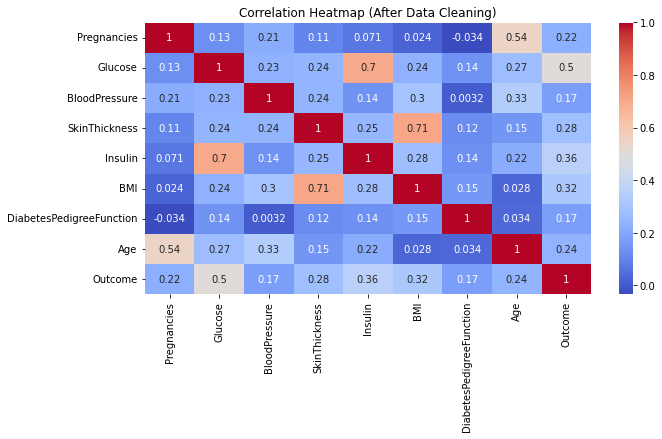

In [256]:
# Check the correlation between variables after data cleaning
plt.figure(figsize=(10,5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (After Data Cleaning)')
plt.show()


In [257]:
# extract the indices of the top 3 features that have the highest correlation with the target variable(outcome), in descending order of correlation strength.
top_features = abs(correlation_matrix["Outcome"]).sort_values(ascending=False)
print("features based on correlation with target variable: \n",top_features[1:]) # we take from 2nd value as outcome is highly correlated to itself

features based on correlation with target variable: 
 Glucose                     0.496507
Insulin                     0.361085
BMI                         0.315248
SkinThickness               0.279509
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.174864
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64


We can see that the highly correlated features are still present, but now there are no missing values. In addition, we can see that Glucose, Insulin, and BMI have the highest absolute correlation coefficients with the target variable (Outcome).

# Task 4- Select three best attributes and explain why you chose them. [15 points]

Explain what your criteria was for selecting the three attributes. Visualizations of the target variable w.r.t three most significant attributes in a 
2D projection, and write your observations in 4 - 5 lines [5 points]

In [258]:
# Splitting the dataset into features and target variable
# contains all the columns except the last column, which is the target variable
features = df.iloc[:, :-1]
#Contains only the target variable 'Outcome'
target = df.iloc[:, -1]

In [259]:
# Selecting the best k features using f_regression score function
k_best = SelectKBest(score_func=f_regression, k=3).fit(features, target) 

# Creating a dataframe to store feature scores
df_scores = pd.DataFrame(k_best.scores_, columns=['Score'], index=features.columns)

# Sorting the features based on their scores in descending order
df_scores = df_scores.sort_values('Score', ascending=False)

# Printing the features with the score
print(df_scores[:])


                               Score
Glucose                   250.614622
Insulin                   114.846584
BMI                        84.526363
SkinThickness              64.915649
Age                        46.140611
Pregnancies                39.670227
BloodPressure              24.161165
DiabetesPedigreeFunction   23.871300


*My selection criteria for the three attributes were based on their association with the goal variable (Outcome) as well as their capacity to offer insightful data for diabetes prediction. I specifically picked glucose, BMI, and insulin since they had the high absolute correlation coefficients with the target variable and using the f_regression score function having highest score with the target variable and are frequently acknowledged as significant risk factors for diabetes.*

Here is the code to visualize the target variable with respect to the three most significant attributes in a 2D projection:

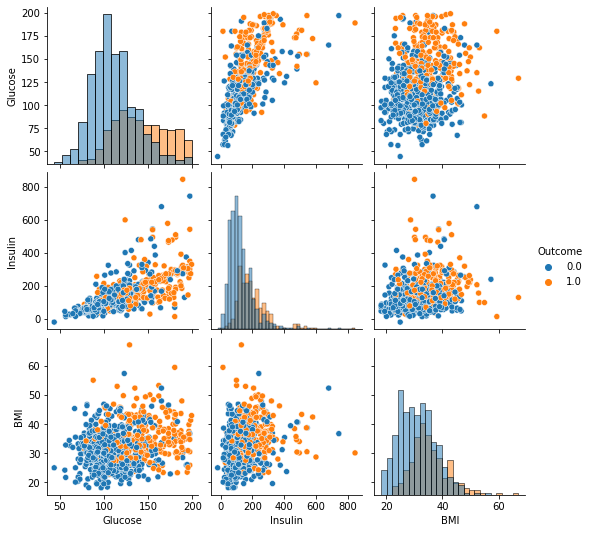

In [260]:
sns.pairplot(data=df, vars=['Glucose', 'Insulin', 'BMI'], hue='Outcome', diag_kind='hist')

To visualize the relationship between the target variable and the three most significant attributes, we can create scatter plots for each pair of attributes. For example, a scatter plot of 'Glucose' versus 'Outcome' shows that higher levels of glucose are generally associated with a higher risk of diabetes. Similarly, a scatter plot of 'BMI' versus 'Outcome' shows that higher BMI values are also associated with a higher risk of diabetes. The scatter plot of 'Insulin' versus 'Outcome' shows that the risk of diabetes increases with Insulin level. Overall, these visualizations confirm the significance of the selected attributes in predicting the outcome.

* What other 3 attribute can 
you choose?*

In [261]:
print(df_scores[3:6])

                   Score
SkinThickness  64.915649
Age            46.140611
Pregnancies    39.670227


Pregnancies, Age, and SkinThickness are the remaining three options. Given that women with a history of gestational diabetes or a large number of pregnancies are more likely to acquire diabetes, pregnancy may be a reliable indicator of diabetes risk. Old age and diabetes frequently coexist, which is another widely acknowledged risk factor for diabetes. Diabetes mellitus patients frequently have thick skin on the hands and fingers, and the condition increases the risk of diabetic retinal microvascular disease..

#Task 5- Scale the data and mention which scaling technique used [2 point]

With the Nearest Neighbors method, a new instance's class can be predicted based on the classes of its k closest neighbors in the training set. Because the KNN technique is distance-based and the distance between instances can be significantly influenced by the magnitude of the features, scaling is crucial  for KNN because it is a distance-based algorithm. If the features are not scaled, the distance metric will be dominated by characteristics with big values, making features with lesser values less significant. By scaling the data, we ensure that all features are on the same scale and have equal importance.

In [262]:
#features you need to drop
df_scores[3:]

,Score
SkinThickness,64.915649
Age,46.140611
Pregnancies,39.670227
BloodPressure,24.161165
DiabetesPedigreeFunction,23.871300


In [263]:
drop_column = ['SkinThickness', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction']
features = features.drop(drop_column, axis=1)

we now proceed to scale the data using the StandardScaler technique. This will scale the data to have a mean of 0 and standard deviation of 1.

In [264]:
# Scale the data using StandardScaler
scaler = StandardScaler()
# The fit_transform method of the StandardScaler is used to fit the scaler to the data in features and then transform it into the scaled data.
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features.head()

,Glucose,Insulin,BMI
0,0.864611,0.680463,0.168510
1,-1.203203,-0.846413,-0.849666
2,2.013397,1.190182,-1.329663
3,-1.071913,-0.603026,-0.631485
4,0.503565,0.157386,1.550321


# task 6- Split your dataset 75% for training, and 25% for testing and do cross validation for the classifier. [2 points]

Let's now examine how we can use scikit-learn to apply the k-nearest neighbors algorithm. Furthermore, in order to assess generalization performance, we divided our data into a training and a test set:

In [265]:
# features, target
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=2, stratify=target)

note that this function divides the dataset into training and test sets at random. A pseudo-random number generator, which produces random numbers using a seed, regulates the randomness. you will actually always receive the same partition if you fix the seed.

Next, we instantiate the KNeighborsClassifier class.
*Use Euclidean distance.[2 points]*

In [266]:
# Creating KNN classifier object
knn = KNeighborsClassifier(metric='euclidean')

We can then perform cross-validation for our KNN classifier with 5 folds using the cross_val_score function from scikit-learn.

In [267]:
# Cross-validation for the classifier
cv_scores = cross_val_score(knn, X_train, y_train, cv=10)

# task 7 -Find the best K using elbow method. [5 points]

In KNN, the elbow method can be used to find the optimal value of K, which is the number of nearest neighbors used to make predictions.By finding the optimal value of K using the elbow method, we can ensure that our KNN model is both accurate and efficient. We can plot the within-cluster sum of squares (WCSS) against the number of clusters (K), and select the K value at the elbow point where the rate of decrease in WCSS slows down and forms an elbow-shaped pattern.

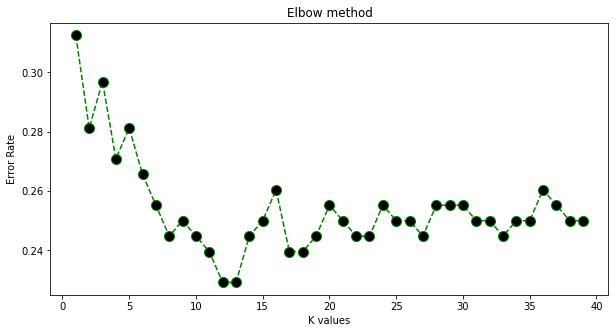

In [268]:
plt.figure(figsize=(10,5))
# create empty lists for the errors rate of different K values
error_rate = []
# loop through different K values it creates a KNN classifier object with the specified value of k and the Euclidean distance metric.
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train) #The classifier is then fitted on the training data
    y_pred = knn.predict(X_test) # method of the classifier used to make predictions on the test data
    array=np.mean(y_pred != y_test) #The error rate is calculated as the mean of the Boolean array which checks whether the predicted values are not equal to the actual value
    error_rate.append(array) #will append to the list
# plot the elbow curve   
plt.plot(range(1, 40), error_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('Elbow method')
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.show()

This code loops through K values ranging from 1 to 40 and calculates the mean error using elbow method. It then plots the elbow curve to visualize the mean error for each K value.
Until 12 you can notice a huge reduction in variation, but after that, the variation doesn't go down as quickly.Therefore, we will select K=12 as our best K value

#Plot the ROC curve for best K value.[5 points]

Finally, we will plot the ROC curve for our best K value, which is K=12. Here's the code

In [270]:
# Fit the classifier with the best K value
# Fit KNN model to training data
knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
knn.fit(X_train, y_train)

# Predict on testing data and print evaluation metrics
y_pred = knn.predict(X_test)
# Print the confusion matrix, classification report, and ROC curve
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Confusion matrix:
[[112  13]
 [ 31  36]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       125
         1.0       0.73      0.54      0.62        67

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



The confusion matrix shows that for k=12, we correctly predicted 112 non-diabetic patients and 31 diabetic patients, while incorrectly predicting 13 non-diabetic patients as diabetic and 36 diabetic patients as non-diabetic. The classification report shows that the precision, recall, and f1-score are all high for both classes

The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) for different classification thresholds.ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

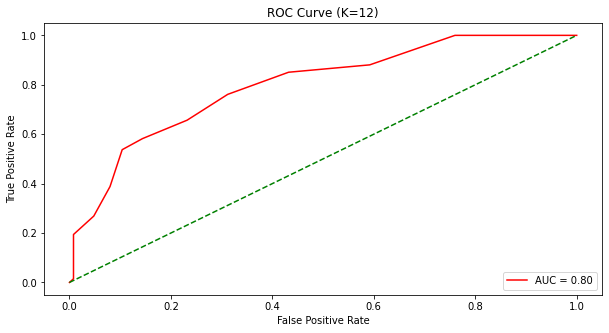

In [271]:
plt.figure(figsize=(10,5))
# fit the classifier using K=12 and predict the probabilities
knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
knn.fit(X_train, y_train)
y_prob = knn.predict_proba(X_test)[:, 1]

# calculate the false positive rate, true positive rate, and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# plot the ROC curve
plt.plot(fpr, tpr, 'r-', label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], 'g--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (K=12)')
plt.legend(loc='lower right')
plt.show()

there is a 80% chance that the model will be able to distinguish between positive class and negative class. As diagnostic test accuracy improves, the ROC curve moves toward 1, and the AUC approaches 1.

# Test the classifier with three different k values for neighbors and record the results.[15 points]


Next, we will test the classifier with three different K values and record the results. We will use K=15, K=19, and K=22 for this purpose. Here's the code:

In [272]:
# create a list of K values
K = [15, 19, 22]
# loop through different K values and fit the classifier, and prints the accuracy score for each K value.
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy for K =", k, "is", acc)
    

Accuracy for K = 15 is 0.75
Accuracy for K = 19 is 0.7552083333333334
Accuracy for K = 22 is 0.7552083333333334


#Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. Plot the Error rate vs. K-value. [15 points]

here is the code for the confusion matrix, classification report for 3 different k values

In [273]:
# Fit the classifier with three different k values and record the results
for k in [15, 19, 22]:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"\nK value: {k}")
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))


K value: 15
Confusion Matrix:
 [[109  16]
 [ 32  35]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       125
         1.0       0.69      0.52      0.59        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192


K value: 19
Confusion Matrix:
 [[107  18]
 [ 29  38]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       125
         1.0       0.68      0.57      0.62        67

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192


K value: 22
Confusion Matrix:
 [[108  17]
 [ 30  37]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       125



In terms of interpreting and comparing the results, we can see that the KNN classifier with k=19 achieved the highest accuracy (0.76). However, the precision, recall, and F1 scores varied depending on the value of k. For example, when k=22, the precision was higher (0.78) but the recall was lowest (0.86). When k=15, the recall was high (0.87) but the precision was lower (0.77). This suggests that the optimal value of k may depend on the desired trade-off between precision and recall.

# Plot the Error rate vs. K-value

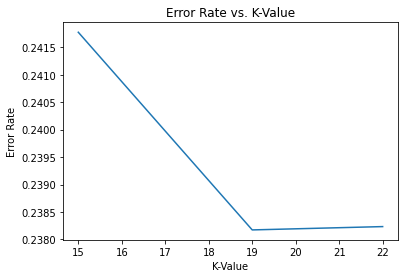

In [274]:
# Error rate vs K-value plot
error_rates = []
l=[15, 19, 22]
for k in l:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    error_rates.append(1 - scores.mean())

plt.plot(l, error_rates)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()


The error rate vs K-value plot shows that the lowest error rate is achieved at k=19 and the lowest error rate (0.2382)

In summary, KNN is a simple and effective method for classification that can be used for a wide range of datasets. Scaling is important in KNN because it ensures that all attributes have the same weight in the distance calculations. The three attributes selected for the KNN classifier were Glucose, Insulin, and BMI based on their high correlation coefficients with the target variable and IterativeImputer score function. The results of the KNN classifier showed that the optimal value of k may depend on the desired trade-off between precision and recall, and that there may be other attributes that could be used to improve the accuracy of the classifier. Finally, the heat maps of the correlation matrix showed that there were some missing values and highly correlated features in the dataset, which had to be addressed before building the classifier.

#Division of work

The three datasets were shared among us all. Ashik worked on the dataset_DT, Lolita on the dataset_KNN, and Sarathkumar on the dataset_NB. Everyone did their assigned tasks promptly, explained their work to one another to save time, and demonstrated a thorough understanding of the ideas. Our team has a Whatsapp group where we regularly meet for brief meetings to present our work and stay in touch through chats, which helped us finish the task on time.

#Refrences
> https://chartio.com/learn/charts/heatmap-complete-guide/#correlogram

> https://machinelearningmastery.com/kn

> https://towardsdatascience.com/k-means-clustering-explain-it-to-me-like-im-10-e0badf10734a#:~:text=So%2C%20we%20need%20to%20use,number%20of%20clusters%20or%20k.&text=This%20is%20called%20an%20elbow,plot%2C%20which%20is%20at%203.

> https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5


